In [2]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
sns.set()
from ipywidgets import interact
import tqdm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Obtenir les data 

Requête pour les appartements :

http://www.seloger.com/list.htm?ci=750113%2C750114%2C750115%2C920049&idtt=1&idtypebien=1&naturebien=1&nb_pieces=2&pxmax=1300&si_meuble=0&surfacemax=50&surfacemin=35&tri=initial&bd=CartoToList_SL

In [3]:
s = requests.Session()
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.120 Safari/537.36"}
url = "http://www.seloger.com/list.htm?ci=750113%2C750114%2C750115%2C920049&idtt=1&idtypebien=1&naturebien=1&nb_pieces=2&pxmax=1300&si_meuble=0&surfacemin=35&tri=initial&bd=CartoToList_SL"
r = s.get(url, headers=headers)
r

<Response [200]>

On parse :

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')

Ceci nous permet d'obtenir deux choses : les liens vers les autres pages et les data des annonces, qui sont directement dans la page.

## prototype data une page

In [5]:
len(soup.find_all('script'))

39

In [6]:
@interact
def browse_script_tags(n=(0, len(soup.find_all('script')) - 1)):
    "Browse script tags."
    print(soup.find_all('script')[n])

In [7]:
data = []
for item in soup.find_all('script'):
    if 'ava_data' in item.text:
        data.append(item.text)
len(data)

2

In [8]:
raw_data = data[1].strip().replace('\r\n', '').split('=')[1][:-21].strip()
raw_data

'{    "search" : {        "levier" : "Recherche depuis la liste",        "nbresults" : "176",        "nbpage" : "1",        "typedetransaction" : ["location"],        "nbpieces" : ["2"],        "typedebien" : ["Appartement"],        "pays" : "FR",        "nbchambres" : [],        "budget" : {            "min" : "",            "max" : "1300"        },        "surface": {            "min" : "35",            "max" : ""        },        "surface_terrain" : {            "min" : "",            "max" : ""        },        "type" : [            {                "name" : "Nouvelle recherche",                "value" : true            },            {                "name" : "Derniere recherche",                "value" : false            },            {                "name" : "Recherche enregistrée",                "value" : false            }        ],        "etage" : {            "min" : "",            "max" : ""        },        "tri" : {            "criteria" : "Sélection",            "direc

In [9]:
struct = json.loads(raw_data)

In [10]:
len(struct['products'])

22

In [11]:
df = pd.DataFrame(struct['products'])

In [12]:
df.columns

Index(['affichagetype', 'codeinsee', 'codepostal', 'cp', 'etage', 'idagence',
       'idannonce', 'idannuaire', 'idbandeau', 'idtiers', 'idtypechauffage',
       'idtypecommerce', 'idtypecuisine', 'idtypepublicationsourcecouplage',
       'naturebien', 'nb_chambres', 'nb_photos', 'nb_pieces', 'position',
       'prix', 'produitsvisibilite', 'si_balcon', 'si_sdEau', 'si_sdbain',
       'surface', 'typedebien', 'typedetransaction'],
      dtype='object')

In [13]:
df.head()

,affichagetype,codeinsee,codepostal,cp,etage,idagence,idannonce,idannuaire,idbandeau,idtiers,...,nb_pieces,position,prix,produitsvisibilite,si_balcon,si_sdEau,si_sdbain,surface,typedebien,typedetransaction
0,"[{'name': 'list', 'value': True}]",920049,92120,92120,4,65166,121081385,NaN,NaN,81717,...,2,0,1200,AD:AC:AH:BB:AW,1,0,1,54,Appartement,[location]
1,"[{'name': 'list', 'value': True}]",750113,75013,75013,23,1097,123581089,NaN,NaN,136882,...,2,1,901,AD:AC:AG:BB:BX:AW,0,0,0,"41,47",Appartement,[location]
2,"[{'name': 'list', 'value': True}]",750115,75015,75015,1,882,123358273,NaN,NaN,1859,...,2,2,950,AD:AC:BB:AW,0,0,1,35,Appartement,[location]
3,"[{'name': 'list', 'value': True}]",750115,75015,75015,1,35474,122467717,NaN,NaN,100005,...,2,3,1148,AD:AC:AG:BC:AW,0,0,0,40,Appartement,[location]
4,"[{'name': 'list', 'value': True}]",750115,75015,75015,4,1509,123616421,NaN,NaN,66095,...,2,4,1215,AD:AC:BC:BX:AW,0,0,1,"45,37",Appartement,[location]


In [14]:
df.tail()

,affichagetype,codeinsee,codepostal,cp,etage,idagence,idannonce,idannuaire,idbandeau,idtiers,...,nb_pieces,position,prix,produitsvisibilite,si_balcon,si_sdEau,si_sdbain,surface,typedebien,typedetransaction
17,"[{'name': 'list', 'value': True}]",920049,92120,92120,7,28649,122072925,NaN,NaN,16365,...,2,17,990,AE:AW,0,0,1,"39,79",Appartement,[location]
18,"[{'name': 'list', 'value': True}]",750113,75013,75013,4,6906,123741373,NaN,NaN,149593,...,2,18,990,-,0,1,0,37,Appartement,[location]
19,"[{'name': 'list', 'value': True}]",920049,92120,92120,2,200744,123381441,NaN,NaN,248119,...,2,19,991,AD:AC:AW,0,0,1,55,Appartement,[location]
20,"[{'name': 'localexpert', 'value': True}]",NaN,75009,NaN,NaN,42168,NaN,59513,397,16729,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,"[{'name': 'localexpert', 'value': True}]",NaN,75007,NaN,NaN,59566,NaN,63041,1327,21283,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
appartment_links = [item.attrs['href'].split('?')[0] for item in soup.find_all('a', class_='c-pa-link')]

In [16]:
len(soup.find_all('a', class_='c-pa-link'))

20

In [17]:
df.shape

(22, 27)

## Toutes les data 

Okay, c'est pas mal mais on veut toutes les data. Comment faire ? Chercher les liens.

In [18]:
links = soup.find('div', class_='pagination-number').find_all('a')

In [19]:
len(links)

8

In [20]:
def get_df_from_url(url):
    """Returns json formatted data from url."""
    r = s.get(url, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    data = []
    for item in soup.find_all('script'):
        if 'ava_data' in item.text:
            data.append(item.text)
    assert len(data) > 0
    raw_data = data[0].strip().replace('\r\n', '').split('=')[1][:-21].strip()
    struct = json.loads(raw_data)
    appartment_links = [item.attrs['href'].split('?')[0] for item in soup.find_all('a', class_='c-pa-link')]
    return pd.DataFrame(struct['products']), appartment_links

In [21]:
dfs = [df]
appartment_links_all = [*appartment_links]
for link in tqdm.tqdm(links):
    suburl = link.attrs['href']
    subdf, sublinks = get_df_from_url(suburl)
    dfs.append(subdf)
    for link in sublinks:
        appartment_links_all.append(link)

100%|██████████| 8/8 [00:07<00:00,  1.25it/s]


In [22]:
df = pd.concat(dfs, axis=0, ignore_index=True)

In [23]:
df.head()

,affichagetype,codeinsee,codepostal,cp,etage,idagence,idannonce,idannuaire,idbandeau,idtiers,...,nb_pieces,position,prix,produitsvisibilite,si_balcon,si_sdEau,si_sdbain,surface,typedebien,typedetransaction
0,"[{'name': 'list', 'value': True}]",920049,92120,92120,4,65166,121081385,NaN,NaN,81717,...,2,0,1200,AD:AC:AH:BB:AW,1,0,1,54,Appartement,[location]
1,"[{'name': 'list', 'value': True}]",750113,75013,75013,23,1097,123581089,NaN,NaN,136882,...,2,1,901,AD:AC:AG:BB:BX:AW,0,0,0,"41,47",Appartement,[location]
2,"[{'name': 'list', 'value': True}]",750115,75015,75015,1,882,123358273,NaN,NaN,1859,...,2,2,950,AD:AC:BB:AW,0,0,1,35,Appartement,[location]
3,"[{'name': 'list', 'value': True}]",750115,75015,75015,1,35474,122467717,NaN,NaN,100005,...,2,3,1148,AD:AC:AG:BC:AW,0,0,0,40,Appartement,[location]
4,"[{'name': 'list', 'value': True}]",750115,75015,75015,4,1509,123616421,NaN,NaN,66095,...,2,4,1215,AD:AC:BC:BX:AW,0,0,1,"45,37",Appartement,[location]


In [24]:
df.shape

(194, 27)

# Formater la DF 

In [25]:
df.columns

Index(['affichagetype', 'codeinsee', 'codepostal', 'cp', 'etage', 'idagence',
       'idannonce', 'idannuaire', 'idbandeau', 'idtiers', 'idtypechauffage',
       'idtypecommerce', 'idtypecuisine', 'idtypepublicationsourcecouplage',
       'naturebien', 'nb_chambres', 'nb_photos', 'nb_pieces', 'position',
       'prix', 'produitsvisibilite', 'si_balcon', 'si_sdEau', 'si_sdbain',
       'surface', 'typedebien', 'typedetransaction'],
      dtype='object')

In [26]:
df = df.drop(['affichagetype', 'idannuaire', 'idbandeau', 'idtiers', 'idtypepublicationsourcecouplage'], axis=1)

In [27]:
df = df.dropna(subset=['prix'])

In [28]:
df.shape

(176, 22)

In [29]:
df['link'] = appartment_links_all

In [30]:
df['surface'] = df['surface'].str.replace(',', '.')

In [31]:
numeric_cols = ['prix', 'surface', 'etage', 'nb_chambres', 'si_balcon', 'si_sdEau', 'si_sdbain', 'nb_pieces']


df[numeric_cols] = df[numeric_cols].applymap(pd.to_numeric)

In [32]:
df[numeric_cols]

,prix,surface,etage,nb_chambres,si_balcon,si_sdEau,si_sdbain,nb_pieces
0,1200,54.00,4,1,1,0,1,2
1,901,41.47,23,1,0,0,0,2
2,950,35.00,1,1,0,0,1,2
3,1148,40.00,1,1,0,0,0,2
4,1215,45.37,4,1,0,0,1,2
5,1183,41.00,3,1,0,0,1,2
6,1150,36.00,7,1,0,1,0,2
7,967,39.87,3,1,0,1,0,2
8,795,36.00,5,1,0,1,0,2
9,825,43.00,0,1,0,1,0,2


# Plots heaven! 

On peut tout de suite tracer surface vs prix.

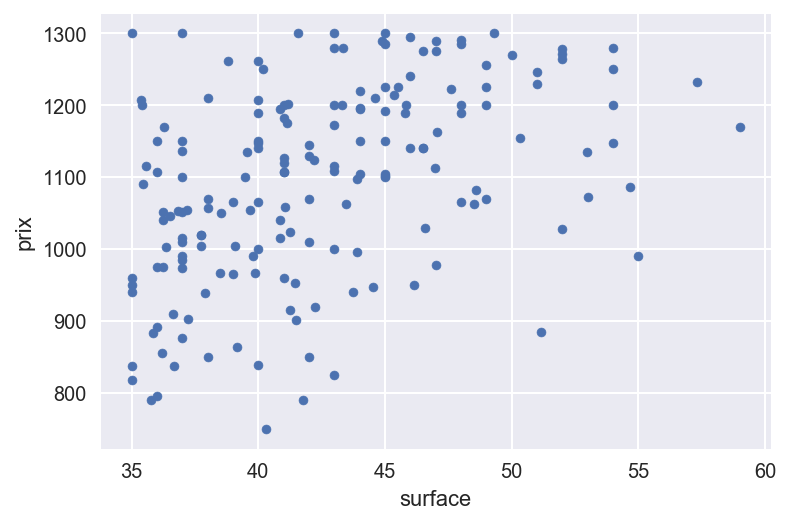

In [33]:
df.plot.scatter(x='surface', y='prix')

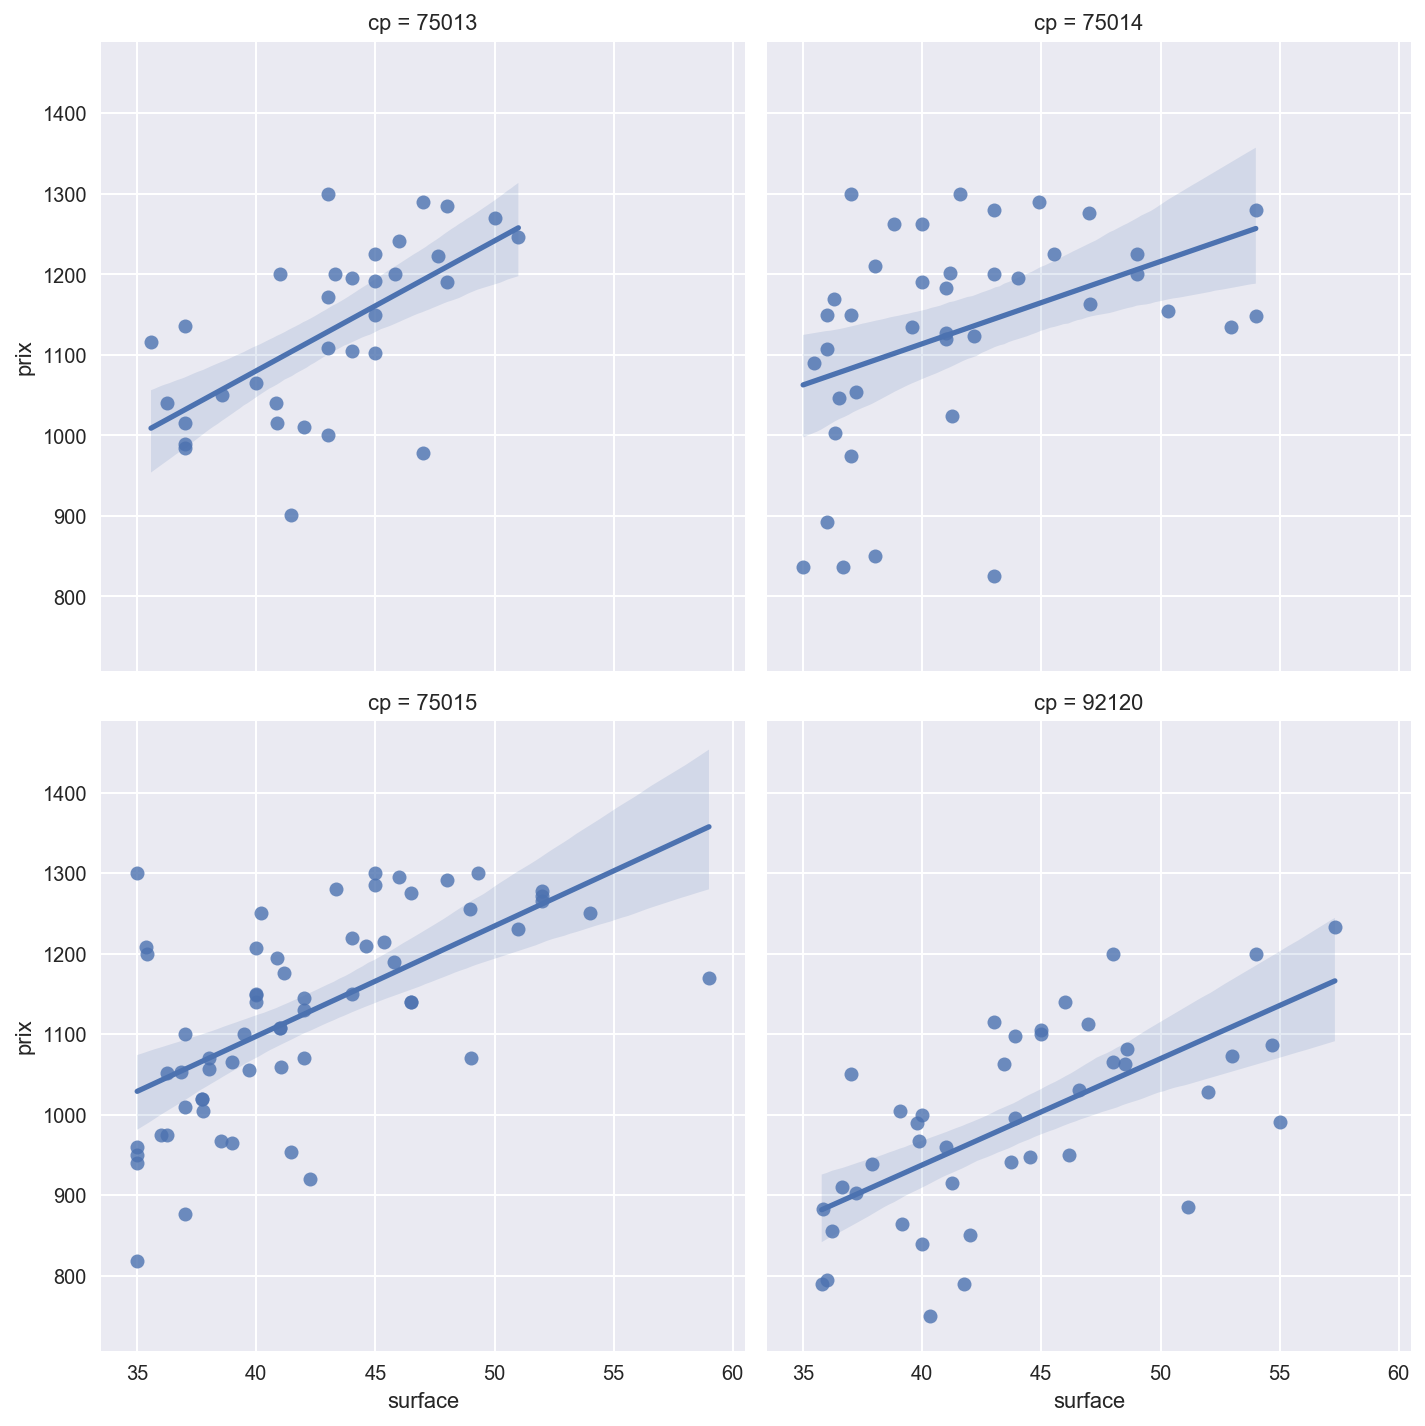

In [34]:
# Plot tip as a function of toal bill across days
g = sns.lmplot(x="surface", y="prix", col="cp", col_wrap=2,
               truncate=True, size=5, data=df)

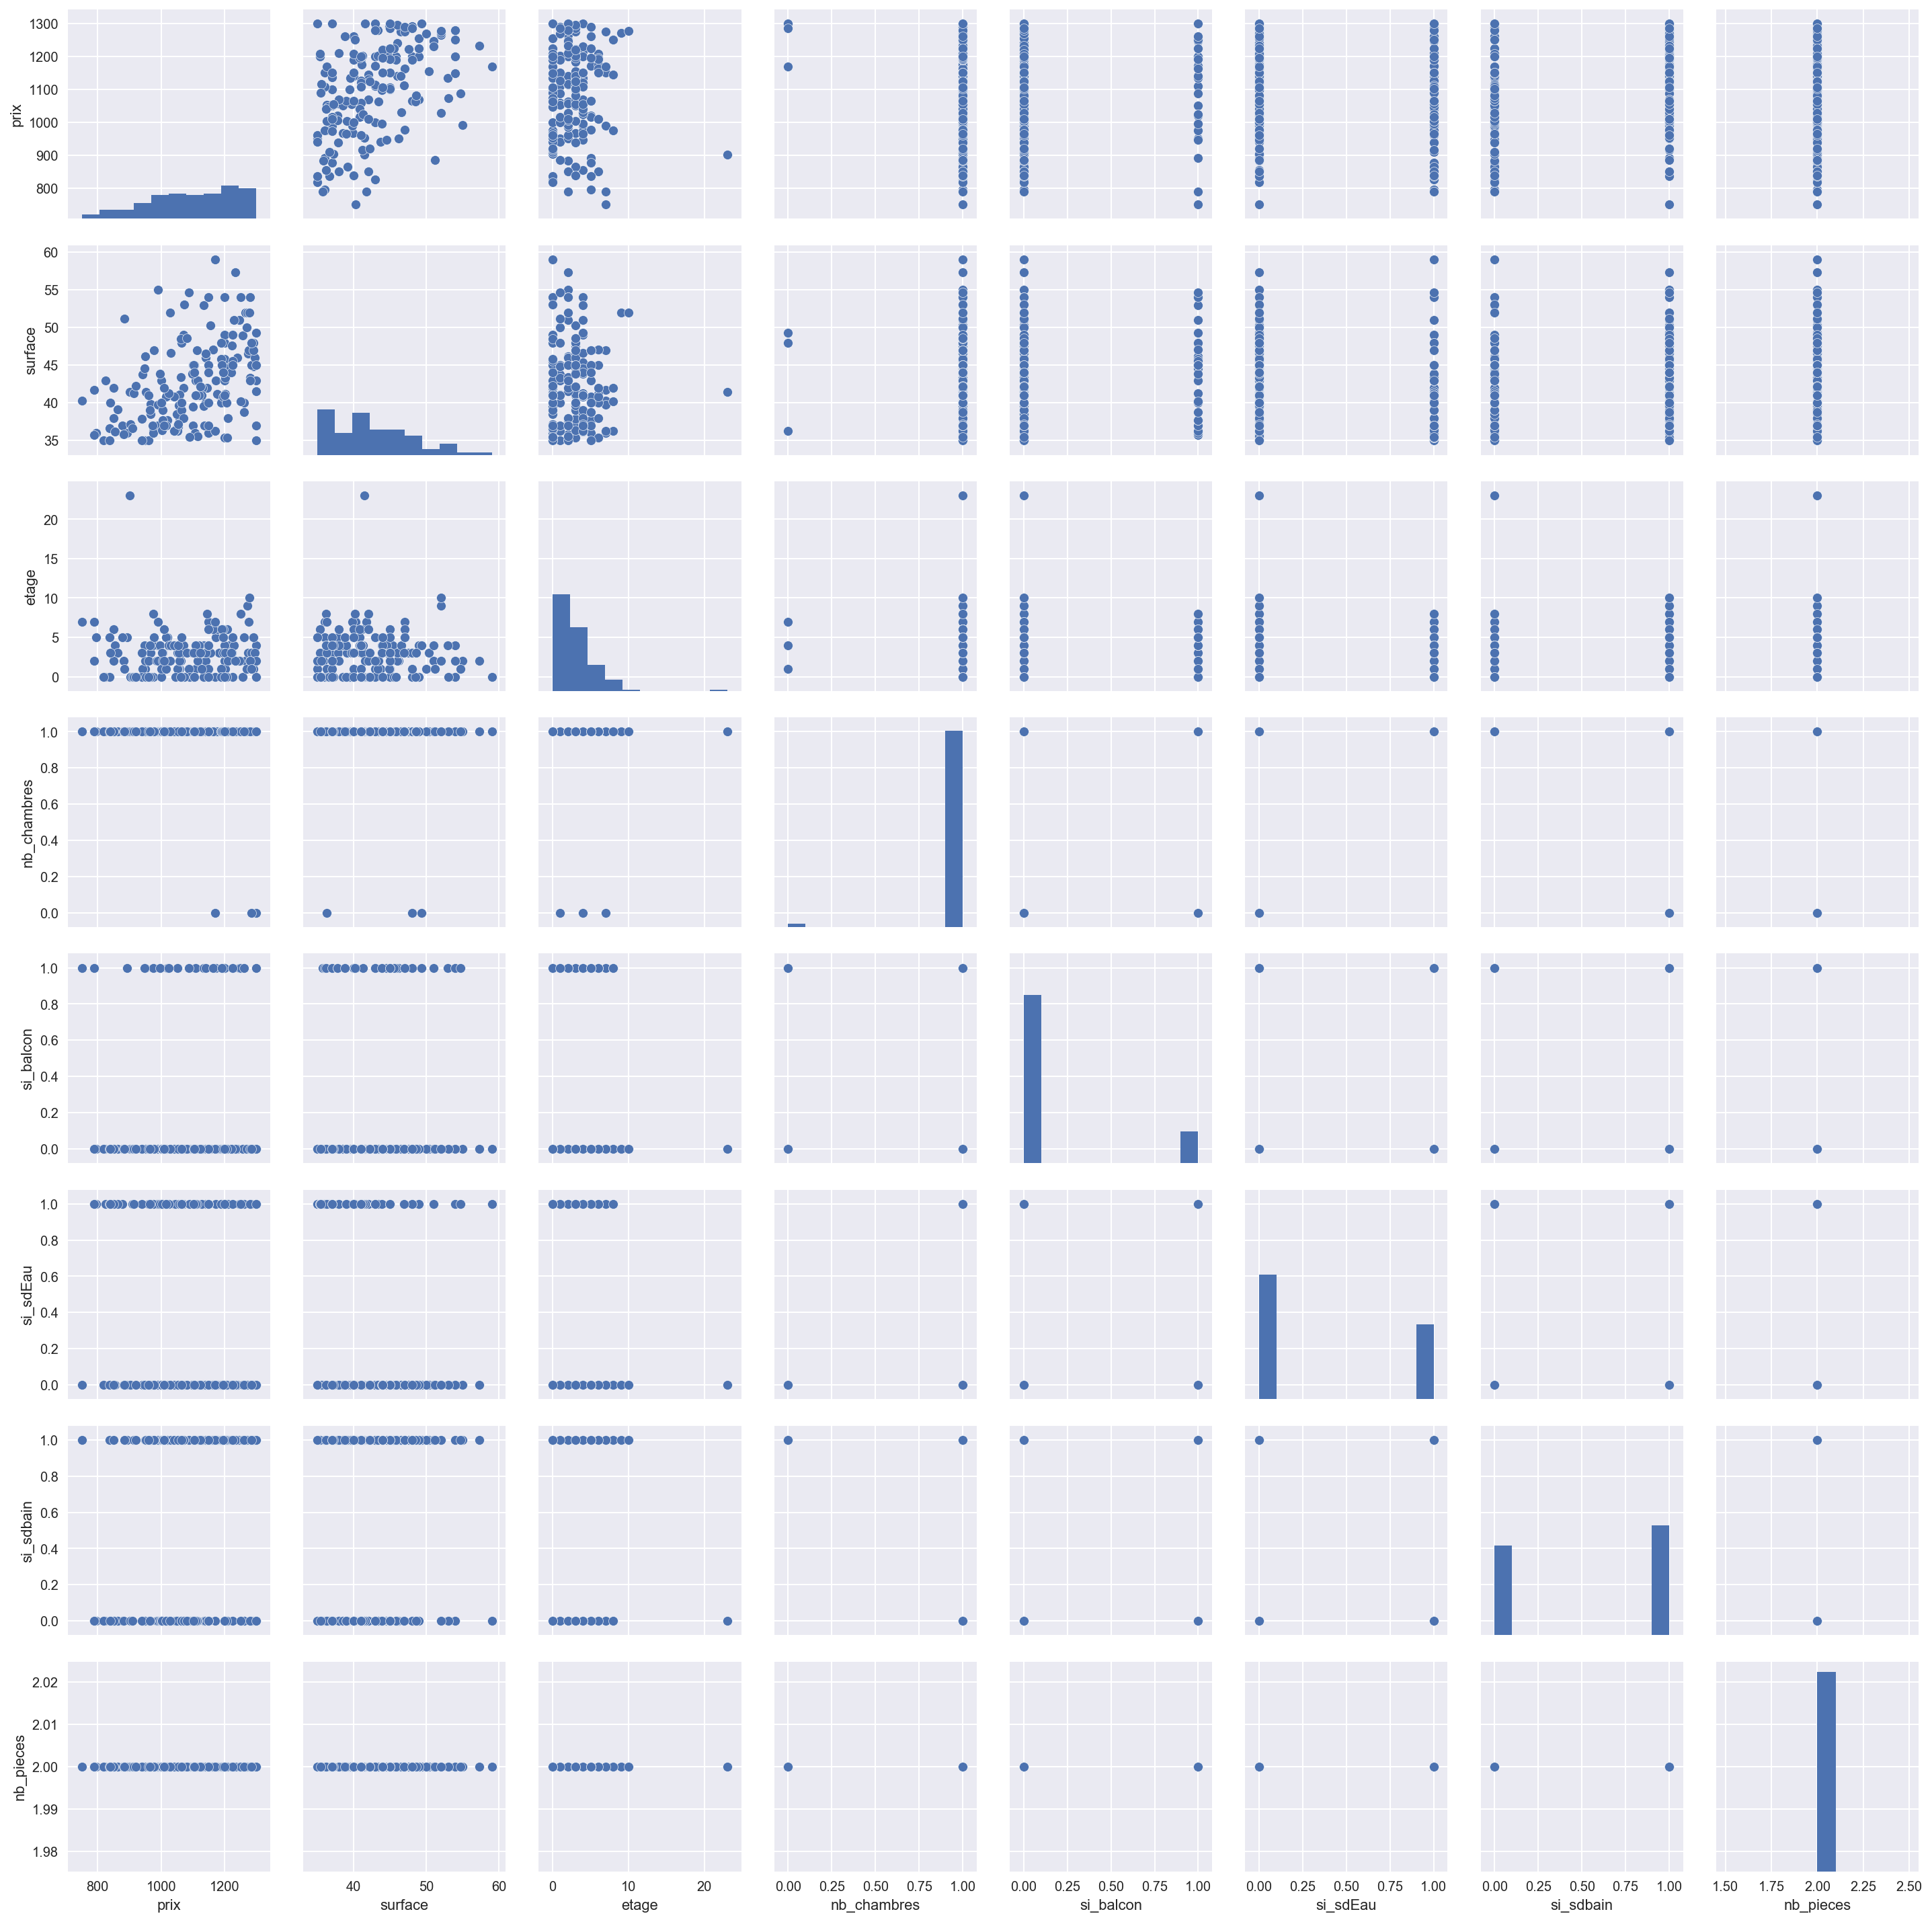

In [35]:
sns.pairplot(df[numeric_cols])

Quelle est l'influence de l'étage ? 

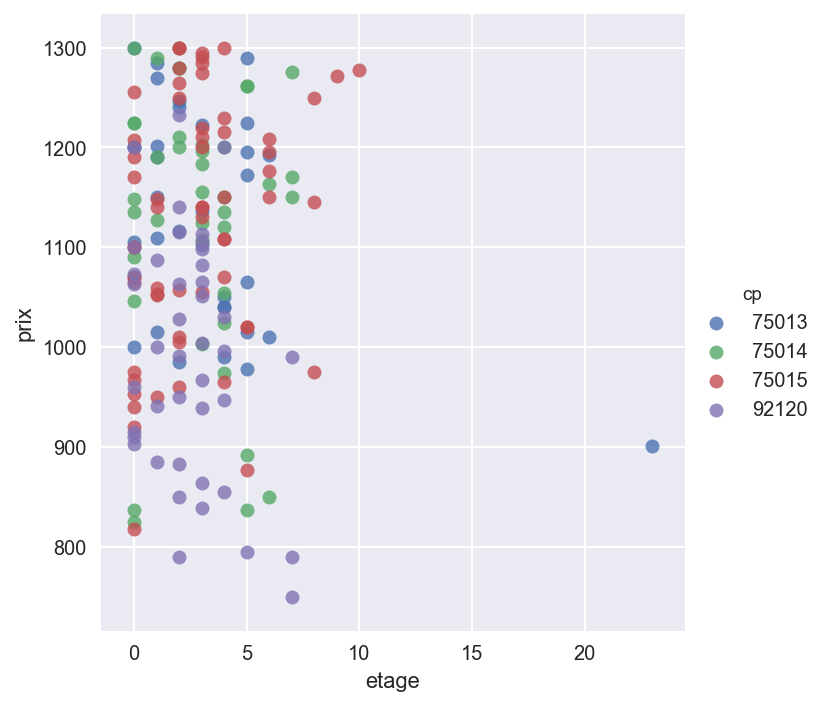

In [36]:
# Plot tip as a function of toal bill across days
g = sns.lmplot(x="etage", y="prix", hue='cp', fit_reg=False,
               truncate=True, size=5, data=df)

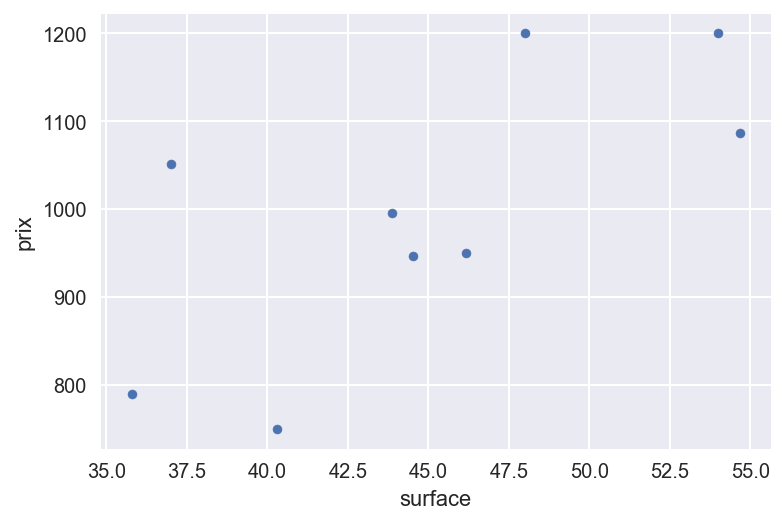

In [37]:
df[(df['si_balcon'] == 1) & (df['cp'] == '92120')].plot.scatter(x='surface', y='prix')

In [38]:
df[(df['si_balcon'] == 1) & (df['cp'] == '92120')]

,codeinsee,codepostal,cp,etage,idagence,idannonce,idtypechauffage,idtypecommerce,idtypecuisine,naturebien,...,position,prix,produitsvisibilite,si_balcon,si_sdEau,si_sdbain,surface,typedebien,typedetransaction,link
0,920049,92120,92120,4,65166,121081385,central électrique radiateur,0,séparée,1,...,0,1200,AD:AC:AH:BB:AW,1,0,1,54.00,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
10,920049,92120,92120,2,107264,123792029,central,0,américaine équipée,1,...,10,790,AD:AC:AH:AG:BX:AW,1,1,0,35.78,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
13,920049,92120,92120,2,56059,123966671,0,0,séparée,1,...,13,950,AD:AW,1,0,0,46.16,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
15,920049,92120,92120,7,37238,124022423,0,0,séparée,1,...,15,750,AD:AC:AH:AG:BX:AW,1,0,1,40.31,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
28,920049,92120,92120,3,28649,119164431,individuel,0,séparée,1,...,6,1051,AE:AW,1,0,1,37.00,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
67,920049,92120,92120,0,28649,122440005,individuel,0,séparée,1,...,1,1200,AE:AW,1,0,1,48.00,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
68,920049,92120,92120,4,56059,123966669,0,0,0,1,...,2,947,AD:AW,1,0,0,44.53,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
113,920049,92120,92120,4,193688,123179693,gaz,0,0,1,...,3,996,BX:AW,1,1,0,43.88,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
114,920049,92120,92120,1,193688,119818463,individuel gaz,0,coin cuisine,1,...,4,1087,BA:BX:AW,1,1,1,54.67,Appartement,[location],http://www.seloger.com/annonces/locations/appa...


In [39]:
df[(df['si_balcon'] == 1) & (df['cp'] == '92120')].iloc[2]['link']

'http://www.seloger.com/annonces/locations/appartement/montrouge-92/peri-brossolette/123966671.htm'

On peut aussi tracer prix / surface :

In [40]:
from IPython.display import HTML

def display_as_html(df, iloc):
    url = df.iloc[iloc]['link']
    return HTML("<a href='{}'>link</a>".format(url))

In [41]:
df['prix/surface'] = df['prix'] / df['surface']

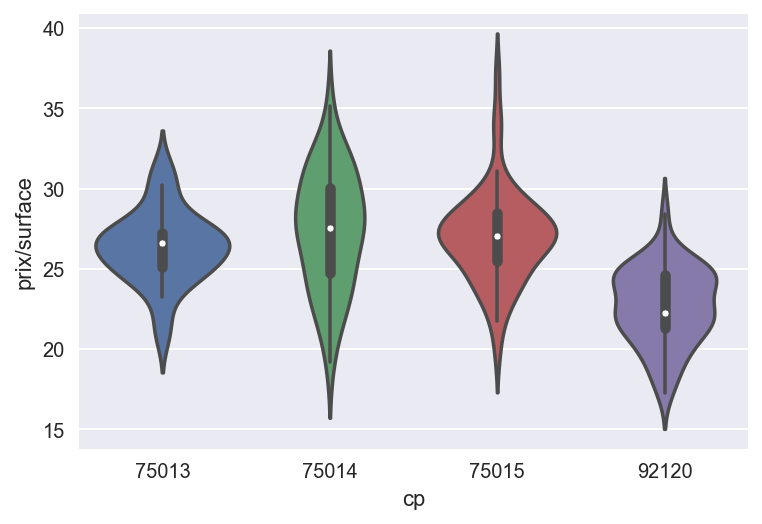

In [42]:
sns.categorical.violinplot(x='cp', y='prix/surface', data=df)

In [43]:
df.sort_values('prix/surface')

,codeinsee,codepostal,cp,etage,idagence,idannonce,idtypechauffage,idtypecommerce,idtypecuisine,naturebien,...,prix,produitsvisibilite,si_balcon,si_sdEau,si_sdbain,surface,typedebien,typedetransaction,link,prix/surface
149,920049,92120,92120,1,39622,123799901,0,0,0,1,...,885,-,0,0,1,51.17,Appartement,[location],http://www.seloger.com/annonces/locations/appa...,17.295290
19,920049,92120,92120,2,200744,123381441,central radiateur,0,0,1,...,991,AD:AC:AW,0,0,1,55.00,Appartement,[location],http://www.seloger.com/annonces/locations/appa...,18.018182
15,920049,92120,92120,7,37238,124022423,0,0,séparée,1,...,750,AD:AC:AH:AG:BX:AW,1,0,1,40.31,Appartement,[location],http://www.seloger.com/annonces/locations/appa...,18.605805
11,920049,92120,92120,7,44797,123260007,individuel électrique,0,séparée,1,...,790,AH:BX:AW,0,1,0,41.76,Appartement,[location],http://www.seloger.com/annonces/locations/appa...,18.917625
9,750114,75014,75014,0,2074,124039035,central,0,séparée,1,...,825,AD:AC:AW,0,1,0,43.00,Appartement,[location],http://www.seloger.com/annonces/locations/appa...,19.186047
181,920049,92120,92120,2,54001,123096231,0,0,0,1,...,1028,-,0,0,0,52.00,Appartement,[location],http://www.seloger.com/annonces/locations/appa...,19.769231
35,750115,75015,75015,0,6906,123587589,individuel gaz radiateur,0,0,1,...,1170,-,0,1,0,59.00,Appartement,[location],http://www.seloger.com/annonces/locations/appa...,19.830508
114,920049,92120,92120,1,193688,119818463,individuel gaz,0,coin cuisine,1,...,1087,BA:BX:AW,1,1,1,54.67,Appartement,[location],http://www.seloger.com/annonces/locations/appa...,19.882934
148,920049,92120,92120,2,41900,123418949,0,0,0,1,...,850,-,0,0,1,42.00,Appartement,[location],http://www.seloger.com/annonces/locations/appa...,20.238095
164,920049,92120,92120,0,2032,119475225,0,0,0,1,...,1073,AD:AC:AW,0,0,0,53.00,Appartement,[location],http://www.seloger.com/annonces/locations/appa...,20.245283


In [44]:
display_as_html(df.sort_values('prix/surface'), 7)

# année de construction 

On récupère le texte intégral des différentes annonces. 

In [45]:
url = df.iloc[0]['link']
url

'http://www.seloger.com/annonces/locations/appartement/montrouge-92/piscine/121081385.htm'

In [46]:
r = s.get(url)

In [47]:
soup = BeautifulSoup(r.text, 'html.parser')

In [48]:
soup.find_all('div', class_='u-left')

[<div class="g-col g-lgrey g-60 g-full-md u-left u-bpad-600 u-padl-0">
 <div class="g-row">
 <div class="g-col g-100">
 <div class="g-row">
 <div class="g-col g-45">
 <div class="c-ti">Prix de l'immobilier</div>
 <ul class="ul-cats-s">
 <li>
 <a href="http://www.seloger.com/prix-immobilier.htm#?BD=Head_AC_PrixImm_8" target="_self">Carte des prix</a></li>
 <li>
 <a href="http://biens-vendus.seloger.com/" target="_self">Derniers biens vendus</a></li>
 <li>
 <a href="http://www.seloger.com/estimation-immobiliere.html#?BD=Head_AC_Esti_10" target="_self">Combien vaut mon bien ?</a></li>
 </ul>
 </div>
 <div class="g-col g-45">
 <div class="c-ti">Investir</div>
 <ul class="ul-cats-s">
 <li>
 <a href="http://edito.seloger.com/conseils-d-experts/acheter/les-check-lists-avant-d-acheter-votre-appartement-sommaire.html#?BD=Head_AC_Ed_11" target="_self">Checklist de l'acheteur</a></li>
 <li>
 <a href="http://edito.seloger.com/rubrique/financement/mesures-fiscales#?BD=Head_AC_Ed_12" target="_self">

# un navigateur interactif 

Idée : faire une IHM avec un bouton oui/non pour naviguer dans tous les résultats. On affiche le HTML important seulement.

In [66]:
url

'http://www.seloger.com/annonces/locations/appartement/montrouge-92/piscine/121081385.htm'

In [72]:
r = s.get(url, headers=headers)

In [73]:
soup = BeautifulSoup(r.text, 'html.parser')

In [80]:
tag = soup.find(id="caracteristique_bien")

In [83]:
for child in tag.children:
    print(child)

En fait, au moment où la page est chargée, elle n'affiche rien. C'est le javascript qui semble remplir la page. Heureusement, nous pouvons aussi exécuter du javascript dans le jupyter notebook.

En particulier, c'est ce script qui est responsable du remplissage :

In [112]:
soup.find_all("script")[5].text

'\r\n    /**\r\n     * Module contenant les infos de l\'annonce\r\n     *\r\n     * Il est recommandé de setter de nouvelles propriétés via Object.defineProperty() en enumerable : true\r\n     *\r\n     * writable et configurable sont par défaut à false, toutes les props initiales de l\'Object sont ainsi rendues immuables\r\n     *\r\n     * @global\r\n     * @type {Object}\r\n     */\r\n    (function(){\r\n        "use strict";\r\n\r\n        window.ConfigDetail = {};\r\n\r\n        /* IdSelector : id de la div main de la page détail */\r\n        Object.defineProperty( ConfigDetail, \'idSelector\', {\r\n          value: "annonce-121081385-494279",\r\n          enumerable: true\r\n        });\r\n\r\n        /* idAnnonce : id de l\'annonce\' */\r\n        Object.defineProperty( ConfigDetail, \'idAnnonce\', {\r\n          value: "121081385",\r\n          enumerable: true\r\n        });\r\n\r\n        /* idPublication : idPublication de l\'annonce\' */\r\n        Object.defineProperty( C

On peut donc l'exécuter avec un object Javascript (inspiré de <https://stackoverflow.com/questions/30902898/ipython-notebook-javascript-retrieve-content-from-javascript-variables>).

In [113]:
from IPython.display import Javascript

In [165]:
obj = Javascript(soup.find_all("script")[5].text)

Maintenant que la variable existe, on peut en lire les champs.

In [166]:
Javascript('element.append(window.ConfigDetail.descriptionBien);')

<IPython.core.display.Javascript object>

In [172]:
%%javascript
IPython.notebook.kernel.execute("Var1=100");

<IPython.core.display.Javascript object>

In [173]:
Var1

100

In [174]:
%%javascript
IPython.notebook.kernel.execute("URL = '" + window.location + "'");

<IPython.core.display.Javascript object>

In [175]:
URL

'http://localhost:8888/notebooks/20170915_seloger.ipynb#'

In [190]:
%%javascript
IPython.notebook.kernel.execute("Var2=" + JSON.stringify(window.ConfigDetail.descriptionBien) +"");

<IPython.core.display.Javascript object>

In [191]:
Var2

"Appartement au 4ème étage d'une copropriété datant de 2001 de Paris Ouest,\r\nTrès calme avec balcon donnant sur espace vert très calme,\r\nDeux pièces, séjour cuisine séparé et chambre avec fenêtres double vitrage exposition ouest,\r\nUn WC séparé et une salle de bains,\r\nLe tout en parfait état,\r\nUn local vélo pour la copropriété,\r\nLe métro à deux minutes à pied, le m, arché et tous les commerces au pied de l'immeuble. Très calme."

Okay it works!
SO ressources :

- https://stackoverflow.com/questions/31818127/can-a-jupyter-ipython-notebook-take-arguments-in-the-url/37134476#37134476
- https://stackoverflow.com/questions/5612787/converting-an-object-to-a-string

On peut tout convertir d'un coup avec la sérialisation JSON :

In [192]:
%%javascript
IPython.notebook.kernel.execute("Var2=" + JSON.stringify(window.ConfigDetail) +"");

<IPython.core.display.Javascript object>

In [193]:
Var2

{'descriptionBien': "Appartement au 4ème étage d'une copropriété datant de 2001 de Paris Ouest,\r\nTrès calme avec balcon donnant sur espace vert très calme,\r\nDeux pièces, séjour cuisine séparé et chambre avec fenêtres double vitrage exposition ouest,\r\nUn WC séparé et une salle de bains,\r\nLe tout en parfait état,\r\nUn local vélo pour la copropriété,\r\nLe métro à deux minutes à pied, le m, arché et tous les commerces au pied de l'immeuble. Très calme.",
 'idAnnonce': '121081385',
 'idPublication': '494279',
 'idQuartier': '131744',
 'idSelector': 'annonce-121081385-494279',
 'idTT': '1',
 'idTypeBien': '1',
 'introMail': 'Bonjour, \n\nVoici une annonce intéressante que je viens de découvrir sur SeLoger :',
 'mapBoundingboxNortheastLatitude': '48.81687',
 'mapBoundingboxNortheastLongitude': '2.32593',
 'mapBoundingboxSouthwestLatitude': '48.81324',
 'mapBoundingboxSouthwestLongitude': '2.31926',
 'mapCoordonneesLatitude': '',
 'mapCoordonneesLongitude': '',
 'mapLevel': 'Or',
 'm

Et est-ce qu'on peut faire la même chose sans la cell magic javascript ?

In [219]:
from IPython.display import Javascript

In [224]:
Javascript('IPython.notebook.kernel.execute("Var1=50");')

<IPython.core.display.Javascript object>

In [225]:
Var1

50

In [259]:
Javascript('IPython.notebook.kernel.execute("Var2=" + JSON.stringify(window.ConfigDetail.descriptionBien) +"");')

<IPython.core.display.Javascript object>

In [260]:
Var2

"Appartement au 4ème étage d'une copropriété datant de 2001 de Paris Ouest,\r\nTrès calme avec balcon donnant sur espace vert très calme,\r\nDeux pièces, séjour cuisine séparé et chambre avec fenêtres double vitrage exposition ouest,\r\nUn WC séparé et une salle de bains,\r\nLe tout en parfait état,\r\nUn local vélo pour la copropriété,\r\nLe métro à deux minutes à pied, le m, arché et tous les commerces au pied de l'immeuble. Très calme."

ça fonctionne !

Résumons :

- je cherche le bon script
- je l'exécute
- je convertis les données JS en object Python
- je fais un tableau avec ça

In [281]:
url = df.iloc[0]['link']

In [282]:
url

'http://www.seloger.com/annonces/locations/appartement/montrouge-92/piscine/121081385.htm'

In [255]:
def extract_data_from_url(url):
    """Returns seloger data from its URL."""
    r = s.get(url, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    script = soup.find_all("script")[5].text
    display_javascript(script)
    json_data = ""
    display_javascript('IPython.notebook.kernel.execute("json_data = " + JSON.stringify(window.ConfigDetail.descriptionBien) +"");')

In [256]:
extract_data_from_url(url)

In [257]:
json_data

NameError: name 'json_data' is not defined

Echec : j'ai un problème de scope...

## Parser le JS ?

In [263]:
script = soup.find_all("script")[5].text

In [262]:
import re

In [286]:
pattern_values = 'value: "(.*)"'
re.findall(pattern_values, script)

['annonce-121081385-494279',
 '121081385',
 '494279',
 '1',
 '1',
 'Appartement',
 '06 80 85 75 32',
 'Location Appartement 54m² Montrouge - Piscine',
 'Bonjour, \\n\\nVoici une annonce intéressante que je viens de découvrir sur SeLoger :',
 '2 pièces',
 '54 m²',
 'Montrouge',
 '131744',
 'Piscine',
 '92120',
 '1\xa0280',
 '1280',
 "Appartement au 4ème étage d\\'une copropriété datant de 2001 de Paris Ouest,\\r\\nTrès calme avec balcon donnant sur espace vert très calme,\\r\\nDeux pièces, séjour cuisine séparé et chambre avec fenêtres double vitrage exposition ouest,\\r\\nUn WC séparé et une salle de bains,\\r\\nLe tout en parfait état,\\r\\nUn local vélo pour la copropriété,\\r\\nLe métro à deux minutes à pied, le m, arché et tous les commerces au pied de l\\'immeuble. Très calme.",
 'Polygon',
 '48.81687',
 '2.32593',
 '48.81324',
 '2.31926',
 '',
 '',
 'POLYGON ((2.3192590288151393 48.814840238258796, 2.3192597667557298 48.814839027592605, 2.3259300008180603 48.813238999988883, 2.32

In [289]:
pattern_keys = "ConfigDetail, '(.+)', {"

re.findall(pattern_keys, script)

['idSelector',
 'idAnnonce',
 'idPublication',
 'idTT',
 'idTypeBien',
 'typeBien',
 'telNumber',
 'objectMail',
 'introMail',
 'nbRoomText',
 'surface',
 'ville',
 'idQuartier',
 'nomQuartier',
 'zipcode',
 'price',
 'rawPrice',
 'descriptionBien',
 'mapModeAffichage',
 'mapBoundingboxNortheastLatitude',
 'mapBoundingboxNortheastLongitude',
 'mapBoundingboxSouthwestLatitude',
 'mapBoundingboxSouthwestLongitude',
 'mapCoordonneesLatitude',
 'mapCoordonneesLongitude',
 'mapPoly',
 'mapLevel',
 'urlRetourRecherche']

In [292]:
dict(zip(re.findall(pattern_keys, script), re.findall(pattern_values, script)))

{'descriptionBien': "Appartement au 4ème étage d\\'une copropriété datant de 2001 de Paris Ouest,\\r\\nTrès calme avec balcon donnant sur espace vert très calme,\\r\\nDeux pièces, séjour cuisine séparé et chambre avec fenêtres double vitrage exposition ouest,\\r\\nUn WC séparé et une salle de bains,\\r\\nLe tout en parfait état,\\r\\nUn local vélo pour la copropriété,\\r\\nLe métro à deux minutes à pied, le m, arché et tous les commerces au pied de l\\'immeuble. Très calme.",
 'idAnnonce': '121081385',
 'idPublication': '494279',
 'idQuartier': '131744',
 'idSelector': 'annonce-121081385-494279',
 'idTT': '1',
 'idTypeBien': '1',
 'introMail': 'Bonjour, \\n\\nVoici une annonce intéressante que je viens de découvrir sur SeLoger :',
 'mapBoundingboxNortheastLatitude': '48.81687',
 'mapBoundingboxNortheastLongitude': '2.32593',
 'mapBoundingboxSouthwestLatitude': '48.81324',
 'mapBoundingboxSouthwestLongitude': '2.31926',
 'mapCoordonneesLatitude': '',
 'mapCoordonneesLongitude': '',
 'ma

On écrit une fonction :

In [293]:
def extract_data_from_url(url):
    """Returns seloger data from its URL."""
    r = s.get(url, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    script = soup.find_all("script")[5].text
    return dict(zip(re.findall(pattern_keys, script), re.findall(pattern_values, script)))

In [301]:
extract_data_from_url(df.iloc[3].link)

{'descriptionBien': "En face de l\\'ancienne imprimerie nationale / Ministère des Affaires étrangères, dans un immeuble récent de standing, un appartement deux pièces comprenant entrée, séjour, chambre, salle de bains avec baignoire et WC. Double vitrage haute isolation, parquet, porte sécurisée, lit rabattable et penderie sur mesure. Avec une cave. Offre de conciergerie gratuite avec notre partenaire MyRoomKeepers.",
 'idAnnonce': '122467717',
 'idPublication': '163188',
 'idQuartier': '133129',
 'idSelector': 'annonce-122467717-163188',
 'idTT': '1',
 'idTypeBien': '1',
 'introMail': 'Bonjour, \\n\\nVoici une annonce intéressante que je viens de découvrir sur SeLoger :',
 'mapBoundingboxNortheastLatitude': '48.84609',
 'mapBoundingboxNortheastLongitude': '2.2827',
 'mapBoundingboxSouthwestLatitude': '48.84125',
 'mapBoundingboxSouthwestLongitude': '2.27466',
 'mapCoordonneesLatitude': '',
 'mapCoordonneesLongitude': '',
 'mapLevel': 'Argent',
 'mapModeAffichage': 'Polygon',
 'mapPoly

In [298]:
df.iloc[1]['link']

'http://www.seloger.com/annonces/locations/appartement/paris-13eme-75/olympiades-choisy/123581089.htm'

Hop, on va faire une boucle !

In [304]:
collected_data = []
for link in tqdm.tqdm_notebook(df.link):
    collected_data.append(extract_data_from_url(link))

In [306]:
detailed = pd.DataFrame(collected_data)

In [307]:
detailed.head()

,descriptionBien,idAnnonce,idPublication,idQuartier,idSelector,idTT,idTypeBien,introMail,mapBoundingboxNortheastLatitude,mapBoundingboxNortheastLongitude,...,nomQuartier,objectMail,price,rawPrice,surface,telNumber,typeBien,urlRetourRecherche,ville,zipcode
0,Appartement au 4ème étage d\'une copropriété d...,121081385,494279,131744,annonce-121081385-494279,1,1,"Bonjour, \n\nVoici une annonce intéressante qu...",48.81687,2.32593,...,Piscine,Location Appartement 54m² Montrouge - Piscine,1 280,1280,54 m²,06 80 85 75 32,Appartement,http://www.seloger.com/immobilier/locations/im...,Montrouge,92120
1,Avenue de Choisy - Tout proche du métro (ligne...,123581089,1097,133116,annonce-123581089-1097,1,1,"Bonjour, \n\nVoici une annonce intéressante qu...",,,...,Olympiades-Choisy,"Location Appartement 41,47m² Paris 13ème - Oly...",901,901,"41,47 m²",01 53 98 58 58,Appartement,http://www.seloger.com/immobilier/locations/im...,Paris 13ème,75013
2,"Quartier Vaugirard/Parc des Expositions, rue V...",123358273,882,,annonce-123358273-882,1,1,"Bonjour, \n\nVoici une annonce intéressante qu...",48.85935,2.32426,...,,Location Appartement 35m² Paris 15ème,950,950,35 m²,01 45 77 46 10,Appartement,http://www.seloger.com/immobilier/locations/im...,Paris 15ème,75015
3,En face de l\'ancienne imprimerie nationale / ...,122467717,163188,133129,annonce-122467717-163188,1,1,"Bonjour, \n\nVoici une annonce intéressante qu...",48.84609,2.2827,...,Citroën-Boucicaut,Location Appartement 40m² Paris 15ème - Citroë...,1 148,1148,40 m²,01 44 61 80 80,Appartement,http://www.seloger.com/immobilier/locations/im...,Paris 15ème,75015
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [308]:
detailed.describe()

,descriptionBien,idAnnonce,idPublication,idQuartier,idSelector,idTT,idTypeBien,introMail,mapBoundingboxNortheastLatitude,mapBoundingboxNortheastLongitude,...,nomQuartier,objectMail,price,rawPrice,surface,telNumber,typeBien,urlRetourRecherche,ville,zipcode
count,155,155,155,155,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
unique,155,155,106,35,155,1,1,1,62,62,...,35,144,105,105,89,106,1,4,4,4
top,1 chambre - 1 salle de bains/salle d\'eau - cu...,123989513,543427,,annonce-123096231-425023,1,1,"Bonjour, \n\nVoici une annonce intéressante qu...",,,...,,Location Appartement 52m² Paris 15ème - George...,1 200,1200,37 m²,01 47 35 70 87,Appartement,http://www.seloger.com/immobilier/locations/im...,Paris 15ème,75015
freq,1,1,9,46,1,155,155,155,32,32,...,46,3,8,8,10,9,155,53,53,53


In [311]:
detailed.nomQuartier.unique()

array(['Piscine', 'Olympiades-Choisy', '', 'Citroën-Boucicaut', nan,
       'Didot-Porte de Vanves', 'Stade', 'Camille Pelletan',
       'Aristide Briand', 'Dispensaire', 'Peri-Brossolette',
       'Violet Commerce', 'Bibliothèque Municipale',
       'Nationale-Deux Moulins', 'Cambronne-Garibaldi', 'Saint Lambert',
       'Pernety', 'Georges Brassens', 'Le Fort', 'Jules Ferry',
       'Vaugirard-Parc des Expositions', 'Alleray Procession',
       'Dupleix-Motte Picquet', 'Bièvres Sud Tolbiac',
       "Dunois-Bibliothèque-Jeanne-d'Arc", 'Pasteur Montparnasse',
       'Croulebarbe', 'Montsouris Dareau', "Jean Moulin-Porte d'Orléans",
       'Patay-Masséna', 'Emeriau-Zola', 'Renaudel', 'Boileau',
       'Marcelin Berthelot', 'Mouton Duvernet', 'Jean Jaures'], dtype=object)

In [312]:
detailed.groupby(by='nomQuartier').count()

,descriptionBien,idAnnonce,idPublication,idQuartier,idSelector,idTT,idTypeBien,introMail,mapBoundingboxNortheastLatitude,mapBoundingboxNortheastLongitude,...,nbRoomText,objectMail,price,rawPrice,surface,telNumber,typeBien,urlRetourRecherche,ville,zipcode
nomQuartier,,,,,,,,,,,,,,,,,,,,,
,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
Alleray Procession,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Aristide Briand,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Bibliothèque Municipale,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bièvres Sud Tolbiac,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Boileau,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Cambronne-Garibaldi,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Camille Pelletan,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Citroën-Boucicaut,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
